In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [ ]:
%pwd
%cd /content/drive/My Drive/assignment3/

/content/drive/My Drive/assignment3


In [ ]:
# data = pd.read_csv('./data/q2_dataset.csv')

In [ ]:
# values = data.values

# targets = []
# features = []
# days = 3
# for i in range(len(values)-days):
#   targets.append(values[i][1].replace('$',''))
#   feature=[]
#   for j in range(2,6):
#     for k in range(0,days):
#       feature.append(values[i+k+1][j])

#   features.append(feature)
# features = np.reshape(features,(len(targets),days*4))
# targets = np.reshape(targets,(len(targets),1))
# targets.shape

In [ ]:
# my_dataset = np.c_[features,targets]

# x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3,random_state=42)
# train_dataset = np.c_[x_train,y_train]
# test_dataset = np.c_[x_test,y_test]
# print(train_dataset.shape)


In [ ]:
# with open('./data/train_data_RNN.csv', 'wb') as f:
#   np.savetxt(f, train_dataset,fmt='%s',delimiter=',')
# f.close

<function BufferedWriter.close>

In [ ]:
# with open('./data/test_data_RNN.csv', 'wb') as f:
  
#   np.savetxt(f, test_dataset,fmt='%s',delimiter=',')
# f.close

<function BufferedWriter.close>

In [ ]:
train_data = np.loadtxt('./data/train_data_RNN.csv',delimiter=',',skiprows=0)
test_data = np.loadtxt('./data/test_data_RNN.csv',delimiter=',',skiprows=0)



In [ ]:

x_train = train_data[:, :-1]
y_train = train_data[:,-1]
x_test = test_data[:, :-1]
y_test = test_data[:,-1]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_train, x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
#create model
def create_model():
  model = Sequential()
  model.add(LSTM(50,input_shape=(x_train.shape[1],1),return_sequences=True))
  model.add(LSTM(100))
  model.add(Dense(1,activation='linear'))
  return model

In [ ]:
model=create_model()

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,patience=3)
model.compile(optimizer='adam', loss='mse',metrics=['mae'])                                 
history = model.fit(x_train,y_train, epochs=600,validation_data=[x_val,y_val])

Train on 703 samples, validate on 176 samples
Epoch 1/600
703/703 [==============================] - 2s 2ms/step - loss: 32727.4474 - mae: 169.4063 - val_loss: 33614.1928 - val_mae: 170.9934
Epoch 2/600
703/703 [==============================] - 1s 2ms/step - loss: 29228.3465 - mae: 158.6803 - val_loss: 31396.1747 - val_mae: 164.2782
Epoch 3/600
703/703 [==============================] - 1s 2ms/step - loss: 27936.5827 - mae: 154.5360 - val_loss: 30461.6825 - val_mae: 161.4069
Epoch 4/600
703/703 [==============================] - 1s 1ms/step - loss: 27118.9216 - mae: 151.8712 - val_loss: 29654.6278 - val_mae: 158.8871
Epoch 5/600
703/703 [==============================] - 1s 2ms/step - loss: 26384.7869 - mae: 149.4129 - val_loss: 28899.7401 - val_mae: 156.4935
Epoch 6/600
703/703 [==============================] - 1s 2ms/step - loss: 25689.0800 - mae: 147.0870 - val_loss: 28190.1559 - val_mae: 154.2097
Epoch 7/600
703/703 [==============================] - 1s 1ms/step - loss: 25029.536

In [ ]:
model.save("./models/20834941_RNN_model.h5")

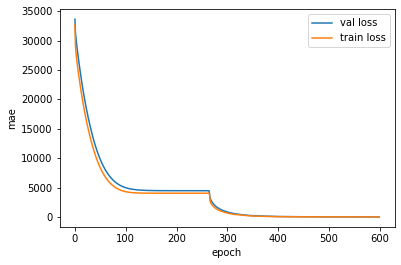

In [ ]:
def plot_loss(history):
  plt.plot(history.history['val_loss'],label="val loss")
  plt.plot(history.history['loss'],label="train loss")
  plt.xlabel('epoch')
  plt.ylabel('mae')

  plt.legend()
  plt.show()

plot_loss(history)